#Import nessessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input
from tensorflow.keras import optimizers
from tensorflow.keras import layers
import numpy as np


import matplotlib.pyplot as plt


#Load MNIST dataset

In [2]:
# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Number of pixels in one image (18x28 = 784) 
N_pixels = X_train.shape[1]*X_train.shape[2]

# Convert to floats and normalize to [0, 1]
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# Reshape the data into a matrix with one row per sample, each row has 784 pixels
X_train_Flatten = X_train.reshape((len(X_train), N_pixels))
X_test_Flatten = X_test.reshape((len(X_test), N_pixels))

print("X_train.shape = ", X_train.shape, "\nX_test.shape = ", X_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
X_train.shape =  (60000, 28, 28) 
X_test.shape =  (10000, 28, 28)


In [3]:
def draw_predictions_set(predictions):
    plt.figure(figsize = (16, 4))
    for i in range(10):
        plt.subplot(2, 10, i+1)
        plt.imshow(X_test[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
        ax = plt.gca()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.subplot(2, 10, i+11)
        plt.imshow(predictions[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
        ax = plt.gca()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.show()

In [4]:
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc = 'upper left')
  plt.show()

#FC Autoencoder - V01

##Build an autoencoder

- One Dense layer: input --> latent space.  `input_dim = N_pixels`. Use ReLU.

- Another Dense layer from latent space to the output layer. Output layer has size $\text{N_pixels}$. Use Sigmoid (can we?)

In [5]:
# First AE - V01
num_latent_vars = 20

my_AE_1 = Sequential()
my_AE_1.add(Dense(20, input_shape=(N_pixels,), activation='relu'))
my_AE_1.add(Dense(N_pixels, activation='sigmoid'))

my_AE_1.compile(optimizer = 'adam', loss = 'mean_squared_error')

history1 = my_AE_1.fit(X_train_Flatten, X_train_Flatten, 
             epochs = 20, 
             batch_size = 256, 
             shuffle = True, 
             verbose = 2, 
             validation_data = (X_test_Flatten, X_test_Flatten)
             )

Epoch 1/20
235/235 - 3s - loss: 0.0771 - val_loss: 0.0467 - 3s/epoch - 12ms/step
Epoch 2/20
235/235 - 1s - loss: 0.0407 - val_loss: 0.0355 - 814ms/epoch - 3ms/step
Epoch 3/20
235/235 - 1s - loss: 0.0325 - val_loss: 0.0291 - 801ms/epoch - 3ms/step
Epoch 4/20
235/235 - 1s - loss: 0.0275 - val_loss: 0.0254 - 797ms/epoch - 3ms/step
Epoch 5/20
235/235 - 1s - loss: 0.0247 - val_loss: 0.0233 - 870ms/epoch - 4ms/step
Epoch 6/20
235/235 - 1s - loss: 0.0230 - val_loss: 0.0220 - 792ms/epoch - 3ms/step
Epoch 7/20
235/235 - 1s - loss: 0.0219 - val_loss: 0.0210 - 841ms/epoch - 4ms/step
Epoch 8/20
235/235 - 1s - loss: 0.0210 - val_loss: 0.0202 - 852ms/epoch - 4ms/step
Epoch 9/20
235/235 - 1s - loss: 0.0203 - val_loss: 0.0196 - 787ms/epoch - 3ms/step
Epoch 10/20
235/235 - 1s - loss: 0.0197 - val_loss: 0.0191 - 845ms/epoch - 4ms/step
Epoch 11/20
235/235 - 1s - loss: 0.0192 - val_loss: 0.0186 - 807ms/epoch - 3ms/step
Epoch 12/20
235/235 - 1s - loss: 0.0188 - val_loss: 0.0182 - 833ms/epoch - 4ms/step
Epo

##Plot the losses

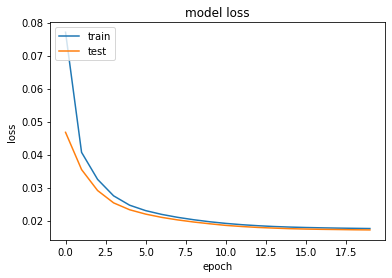

In [6]:
plot_loss(history1)

##Print out some results.

- Use `my_AE_1.predict(X_test_Flatten)` to get the output of the autoencoder.

- Use `draw_predictions_set(...)` to print out $10$ samples.

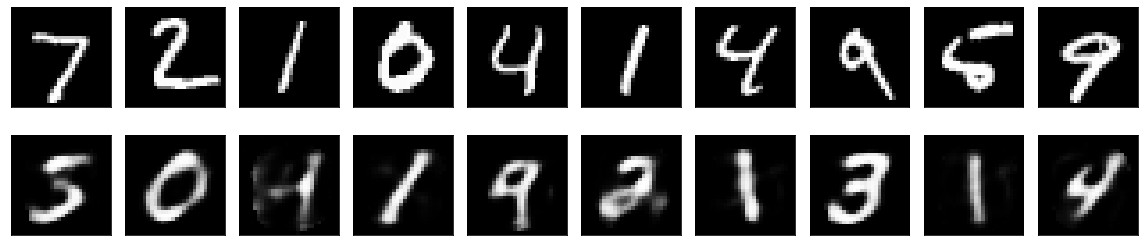

In [7]:
pred_1 = my_AE_1.predict(X_train_Flatten)
draw_predictions_set(pred_1)

#FC Autoencoder - V02 using `Flatten()` and `Reshape()` layers

Using of these two layers help us work directly with images.

Comparing with V01, the differences are

- A Flatten layer before the first Dense layer.

- A Reshape layer (`Reshape((28, 28))`) is added after the last Dense layer.

##Build an autoencoder

In [8]:
# First AE - V02

np.random.seed(1)

#my_AE_1 = Sequential()
#my_AE_1.add(Dense(20, input_shape=(N_pixels,), activation='relu'))
#my_AE_1.add(Dense(N_pixels, activation='sigmoid'))

num_latent_vars = 20

my_AE_2 = Sequential()
my_AE_2.add(Flatten())
my_AE_2.add(Dense(20, activation='relu'))
my_AE_2.add(Dense(784, activation='sigmoid'))
my_AE_2.add(Reshape((28,28)))

my_AE_2.compile(optimizer = 'adam', loss = 'mean_squared_error')


history2 = my_AE_2.fit(X_train, X_train, 
             epochs = 20, 
             batch_size = 256, 
             shuffle = True, 
             verbose = 2, 
             validation_data = (X_test, X_test)
             )

Epoch 1/20
235/235 - 2s - loss: 0.0769 - val_loss: 0.0481 - 2s/epoch - 8ms/step
Epoch 2/20
235/235 - 2s - loss: 0.0409 - val_loss: 0.0354 - 2s/epoch - 7ms/step
Epoch 3/20
235/235 - 1s - loss: 0.0324 - val_loss: 0.0293 - 1s/epoch - 6ms/step
Epoch 4/20
235/235 - 1s - loss: 0.0279 - val_loss: 0.0259 - 1s/epoch - 6ms/step
Epoch 5/20
235/235 - 1s - loss: 0.0251 - val_loss: 0.0237 - 1s/epoch - 6ms/step
Epoch 6/20
235/235 - 1s - loss: 0.0232 - val_loss: 0.0222 - 1s/epoch - 6ms/step
Epoch 7/20
235/235 - 1s - loss: 0.0219 - val_loss: 0.0210 - 1s/epoch - 6ms/step
Epoch 8/20
235/235 - 1s - loss: 0.0209 - val_loss: 0.0202 - 992ms/epoch - 4ms/step
Epoch 9/20
235/235 - 1s - loss: 0.0201 - val_loss: 0.0195 - 856ms/epoch - 4ms/step
Epoch 10/20
235/235 - 1s - loss: 0.0195 - val_loss: 0.0189 - 808ms/epoch - 3ms/step
Epoch 11/20
235/235 - 1s - loss: 0.0190 - val_loss: 0.0184 - 873ms/epoch - 4ms/step
Epoch 12/20
235/235 - 1s - loss: 0.0186 - val_loss: 0.0181 - 866ms/epoch - 4ms/step
Epoch 13/20
235/235 - 

##Plot the losses and some results.

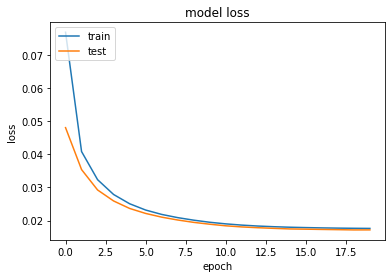

In [9]:
plot_loss(history2)

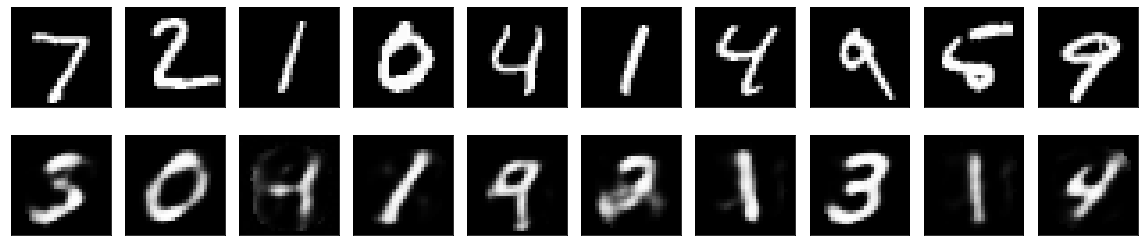

In [10]:
pred_2 = my_AE_2.predict(X_train)
draw_predictions_set(pred_2)

#FC Autoencoder - V03 - Separate Encoder and Decoder

The principle is quite straightforward:

- Build an encoder.

- Build an decoder.

- Join them up.

##Build an autoencoder

In [11]:
from tensorflow.python.keras.backend import conv2d_transpose
encoder = Sequential([
                      Flatten(),
                      Dense(num_latent_vars, activation = 'relu')                     
])

# Build the decoder                   
decoder = Sequential([
                      #Dense(20, activation='relu'),
                      Dense(784, activation='sigmoid'),
                      Reshape((28,28))
])

# Define the input to the autoencoder
input_img = Input(shape = (28, 28))

output_of_encoder = encoder(input_img)
output_of_decoder = decoder(output_of_encoder)

my_AE_3 = Model(input_img, output_of_decoder)

my_AE_3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 sequential_2 (Sequential)   (None, 20)                15700     
                                                                 
 sequential_3 (Sequential)   (None, 28, 28)            16464     
                                                                 
Total params: 32,164
Trainable params: 32,164
Non-trainable params: 0
_________________________________________________________________


In [12]:
my_AE_3.compile(optimizer = 'adam', loss = 'mean_squared_error')


history3 = my_AE_3.fit(X_train, X_train, 
             epochs = 20, 
             batch_size = 256, 
             shuffle = True, 
             verbose = 2, 
             validation_data = (X_test, X_test)
             )

Epoch 1/20
235/235 - 1s - loss: 0.0771 - val_loss: 0.0466 - 1s/epoch - 6ms/step
Epoch 2/20
235/235 - 1s - loss: 0.0404 - val_loss: 0.0353 - 859ms/epoch - 4ms/step
Epoch 3/20
235/235 - 1s - loss: 0.0325 - val_loss: 0.0291 - 868ms/epoch - 4ms/step
Epoch 4/20
235/235 - 1s - loss: 0.0275 - val_loss: 0.0252 - 866ms/epoch - 4ms/step
Epoch 5/20
235/235 - 1s - loss: 0.0245 - val_loss: 0.0230 - 821ms/epoch - 3ms/step
Epoch 6/20
235/235 - 1s - loss: 0.0227 - val_loss: 0.0217 - 880ms/epoch - 4ms/step
Epoch 7/20
235/235 - 1s - loss: 0.0215 - val_loss: 0.0207 - 803ms/epoch - 3ms/step
Epoch 8/20
235/235 - 1s - loss: 0.0206 - val_loss: 0.0199 - 821ms/epoch - 3ms/step
Epoch 9/20
235/235 - 1s - loss: 0.0200 - val_loss: 0.0193 - 816ms/epoch - 3ms/step
Epoch 10/20
235/235 - 1s - loss: 0.0194 - val_loss: 0.0188 - 826ms/epoch - 4ms/step
Epoch 11/20
235/235 - 1s - loss: 0.0190 - val_loss: 0.0184 - 868ms/epoch - 4ms/step
Epoch 12/20
235/235 - 1s - loss: 0.0186 - val_loss: 0.0181 - 938ms/epoch - 4ms/step
Epoc

##Plot the losses and some results.

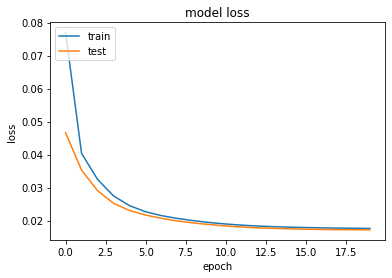

In [13]:
plot_loss(history3)

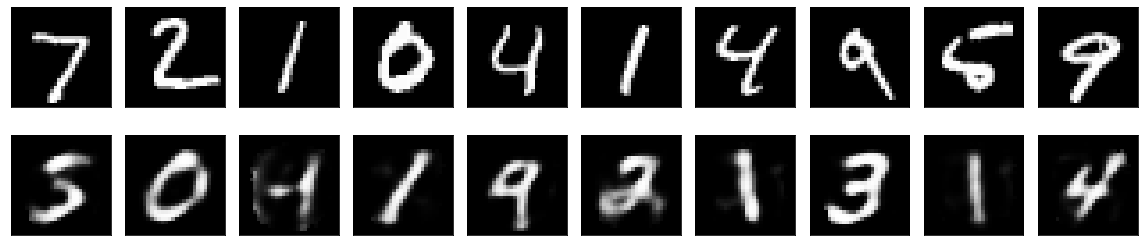

In [14]:
pred_3 = my_AE_3.predict(X_train)
draw_predictions_set(pred_3)

#FC Autoencoder - V04

We will use more Dense layers in this model. Furthermore, we will have two complete models for the encoder and decoder.

##Build an autoencoder, encoder and decoder.

In [15]:
encoder = Sequential([
                      Flatten(),
                      Dense(512, activation = 'relu'),
                      Dense(256, activation = 'relu'),
                      Dense(num_latent_vars, activation = 'relu')                     
])

# Build the decoder  
# Dense: 256 units, relu
# Dense: 512 units, relu
# Dense: N_pixels units, sigmoid
# Reshape((28, 28))                 
decoder = Sequential([
                      Dense(256, activation='relu'),
                      Dense(512, activation='relu'),
                      Dense(784, activation='sigmoid'),
                      Reshape((28,28))
])

# Define the input to the autoencoder
input_img = Input(shape = (28, 28))

output_of_encoder = encoder(input_img)
output_of_decoder = decoder(output_of_encoder)

my_AE_4 = Model(input_img, output_of_decoder)

my_AE_4_Encoder_Only = Model(input_img, output_of_encoder)

decoder_only_input = Input(shape = (num_latent_vars,))
my_AE_4_Decoder_Only = Model(decoder_only_input, decoder(decoder_only_input))

##Model summary

In [16]:
my_AE_4.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 sequential_4 (Sequential)   (None, 20)                538388    
                                                                 
 sequential_5 (Sequential)   (None, 28, 28)            539152    
                                                                 
Total params: 1,077,540
Trainable params: 1,077,540
Non-trainable params: 0
_________________________________________________________________


In [17]:
my_AE_4_Encoder_Only.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 sequential_4 (Sequential)   (None, 20)                538388    
                                                                 
Total params: 538,388
Trainable params: 538,388
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_AE_4_Decoder_Only.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 20)]              0         
                                                                 
 sequential_29 (Sequential)  (None, 28, 28)            539152    
                                                                 
Total params: 539,152
Trainable params: 539,152
Non-trainable params: 0
_________________________________________________________________


##Train the autodecoder

In [18]:
my_AE_4.compile(optimizer = 'adam', loss = 'mean_squared_error')


history4 = my_AE_4.fit(X_train, X_train, 
             epochs = 20, 
             batch_size = 256, 
             shuffle = True, 
             verbose = 2, 
             validation_data = (X_test, X_test)
             )

Epoch 1/20
235/235 - 2s - loss: 0.0507 - val_loss: 0.0242 - 2s/epoch - 9ms/step
Epoch 2/20
235/235 - 1s - loss: 0.0205 - val_loss: 0.0171 - 1s/epoch - 6ms/step
Epoch 3/20
235/235 - 1s - loss: 0.0160 - val_loss: 0.0145 - 1s/epoch - 6ms/step
Epoch 4/20
235/235 - 1s - loss: 0.0141 - val_loss: 0.0133 - 1s/epoch - 6ms/step
Epoch 5/20
235/235 - 1s - loss: 0.0130 - val_loss: 0.0125 - 1s/epoch - 6ms/step
Epoch 6/20
235/235 - 1s - loss: 0.0122 - val_loss: 0.0118 - 1s/epoch - 6ms/step
Epoch 7/20
235/235 - 1s - loss: 0.0116 - val_loss: 0.0113 - 1s/epoch - 6ms/step
Epoch 8/20
235/235 - 1s - loss: 0.0112 - val_loss: 0.0109 - 1s/epoch - 6ms/step
Epoch 9/20
235/235 - 1s - loss: 0.0107 - val_loss: 0.0106 - 1s/epoch - 6ms/step
Epoch 10/20
235/235 - 1s - loss: 0.0104 - val_loss: 0.0102 - 1s/epoch - 6ms/step
Epoch 11/20
235/235 - 1s - loss: 0.0101 - val_loss: 0.0101 - 1s/epoch - 6ms/step
Epoch 12/20
235/235 - 2s - loss: 0.0099 - val_loss: 0.0099 - 2s/epoch - 7ms/step
Epoch 13/20
235/235 - 2s - loss: 0.00

##Plot the losses and some results

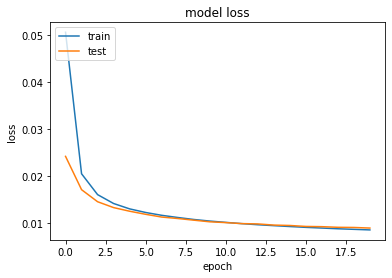

In [19]:
plot_loss(history4)

##Explore the latent space

In [20]:
encoder_pred = my_AE_4_Encoder_Only.predict(X_test)

print("Shape of encoder_pred: ", encoder_pred.shape)

Shape of encoder_pred:  (10000, 20)


We will have a plt which has 3 subplots.

- First subplot (first row): $10$ images in the test set

- Second subplot (second row): bar plots of the ten corresponding outputs of the encoder

- Third row: outputs of the decoder. The ouput is calculated by

  - Resise the ouput of the encoder to $(1, \text{num_latent_vars})$

  - Pass it throught the decoder: `my_AE_4_Decoder_Only.predict()`. The size of the output is: $(1, 28, 28$).

  - Use `np.squeeze()` to remove the first dimension to get $(28, 28)$

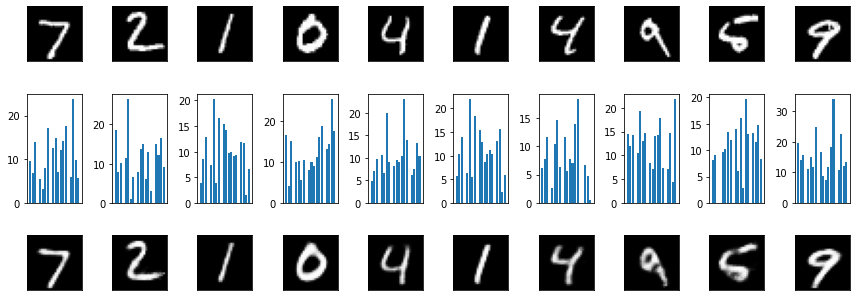

In [21]:
plt.figure(figsize = (12, 5))

for i in range(10):
    plt.subplot(3, 10, i+1)
    plt.imshow(X_test[i], vmin = 0, vmax = 1, cmap = "gray")
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    plt.subplot(3, 10, i+11)
    plt.bar(np.arange(len(encoder_pred[i])), encoder_pred[i])
    plt.xticks([], [])
    
    
    plt.subplot(3, 10, i+21)
    decoder_only_input = np.resize(encoder_pred[i], (1, len(encoder_pred[i])))
    decoder_prediction = my_AE_4_Decoder_Only.predict(decoder_only_input)
    decoder_prediction = np.squeeze(decoder_prediction, axis = 0)
    plt.imshow(decoder_prediction, vmin = 0, vmax = 1, cmap = "gray")
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

##Let's have some fun!

In [22]:
noise = 5

The first tens rows of `encoder_pred` can be extracted by: `encoder_pred[:10, :]`

In [23]:
encoder_pred[:10, :].shape

(10, 20)

Use [np.random.uniform](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) to add noise to the latent variables.

In [24]:
encoder_pred_noisy = encoder_pred[:10, :] + np.random.uniform(low = - noise, high = noise, size = encoder_pred[:10, :].shape)

Based on the code displaying three rows above to add two more rows.

- Fourth row: bar plots of rows of `encoder_pred_noisy`

- Fifth row: outputs of the decoder if the input is rows of `encoder_pred_noisy`

##With noisy input##

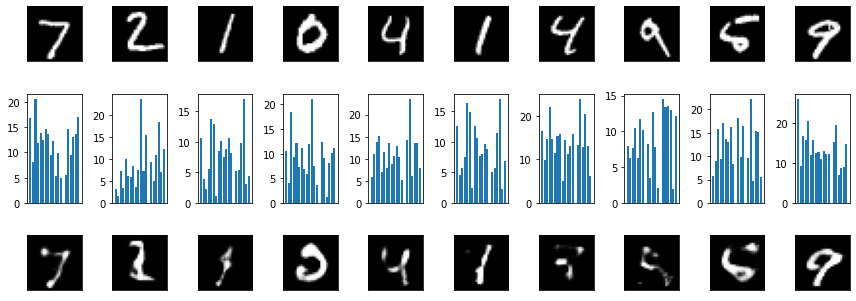

In [ ]:
plt.figure(figsize = (12, 5))

for i in range(10):
    plt.subplot(3, 10, i+1)
    plt.imshow(X_test[i], vmin = 0, vmax = 1, cmap = "gray")
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    plt.subplot(3, 10, i+11)
    plt.bar(np.arange(len(encoder_pred[i])), encoder_pred[i])
    plt.xticks([], [])

    plt.subplot(3, 10, i+21)
    decoder_only_input = np.resize(encoder_pred_noisy[i], (1, len(encoder_pred_noisy[i])))
    decoder_prediction = my_AE_4_Decoder_Only.predict(decoder_only_input)
    decoder_prediction = np.squeeze(decoder_prediction, axis = 0)
    plt.imshow(decoder_prediction, vmin = 0, vmax = 1, cmap = "gray")

    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

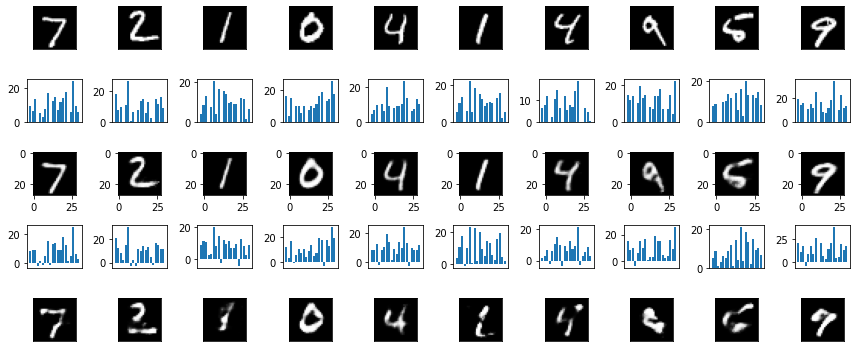

In [26]:
plt.figure(figsize = (12, 5))

for i in range(10):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_test[i], vmin = 0, vmax = 1, cmap = "gray")
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    plt.subplot(5, 10, i+11)
    plt.bar(np.arange(len(encoder_pred[i])), encoder_pred[i])
    plt.xticks([], [])
    
    
    plt.subplot(5, 10, i+21)
    decoder_only_input = np.resize(encoder_pred[i], (1, len(encoder_pred[i])))
    decoder_prediction = my_AE_4_Decoder_Only.predict(decoder_only_input)
    decoder_prediction = np.squeeze(decoder_prediction, axis = 0)
    plt.imshow(decoder_prediction, vmin = 0, vmax = 1, cmap = "gray")

    plt.subplot(5, 10, i+31)
    plt.bar(np.arange(len(encoder_pred_noisy[i])), encoder_pred_noisy[i])
    plt.xticks([], [])

    plt.subplot(5, 10, i+41)
    decoder_only_input = np.resize(encoder_pred_noisy[i], (1, len(encoder_pred_noisy[i])))
    decoder_prediction = my_AE_4_Decoder_Only.predict(decoder_only_input)
    decoder_prediction = np.squeeze(decoder_prediction, axis = 0)
    plt.imshow(decoder_prediction, vmin = 0, vmax = 1, cmap = "gray")

    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()